<a href="https://colab.research.google.com/github/alirrah/SNUI/blob/master/SN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ntscraper

In [ ]:
import pandas as pd
from ntscraper import Nitter

scraper = Nitter()

Testing instances: 100%|██████████| 31/31 [00:46<00:00,  1.50s/it]


In [ ]:
allTweets = []
user = {'imVkohli'}
selected_user = set()

for i in range(5):
  member = list(user - selected_user)[0]
  selected_user.add(member)
  tweet_number = scraper.get_profile_info(member)['stats']['tweets']

  tweets = scraper.get_tweets(member , mode='user', number=min(tweet_number, 500))

  for tweet in tweets['tweets']:
    data = []

    if tweet['is-retweet'] == True:
      user.add(tweet['user']['username'][1:])
      allTweets.append([tweet['user']['username'][1:], tweet['text'], tweet['date'], True])
      data = [member, tweet['text'], tweet['date'], True]

    else:
      data = [member, tweet['text'], tweet['date'], False]

    allTweets.append(data)

INFO:root:No instance specified, using random instance https://nitter.in.projectsegfau.lt
INFO:root:No instance specified, using random instance https://nitter.catsarch.com
INFO:root:Current stats for imVkohli: 20 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 40 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 60 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 78 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 98 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 118 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 138 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 158 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 178 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 198 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 218 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 238 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 258 tweets, 0 threads...
INFO:root:Cur

In [ ]:
print(user)
print(len(user))
print(allTweets)
print(len(allTweets))

i = 0
for item in allTweets:
  if item[3] == True:
    i+=1
print(i)

{'meme_ki_diwani', 'ticketkaaran', 'OctaneAddict', 'Ashwin_tweetz', 'chennaicorp', 'shivams009', 'Idiotic_luv_', 'I_Raj13', 'cinecorndotcom', 'DisneyPlusHS', 'tarunreddyoo7', 'primevideomy', 'targariyan', '1991ragu', '_Vettukili_', 'NikileshSurya', 'SuperstarFan90s', 'Useralivee', 'imVkohli', 'bhogleharsha', '_PVRCinemas', 'sunpictures', 'MIFansArmy', 'opusindia_', 'Flipkart', 'obrienvm24', 'moms_kunafa', 'MSPMovieManiac', 'K_cinemaclub', 'South_Cinema_BO', 'EGACinemas', 'MRFWorldwide', 'filmyconnect', '7465outof100', 'nsitharamanoffc', 'royalstaglil', 'therukhstar', 'kishendas', 'Rainmaker1973', 'TamilNaduInfra', 'JBLQuantum', 'TicketNew', 'dcciofficial', 'ashwinravi99', 'PaytmTickets', 'coool_kashish', 'INOXMovies', 'staarrlord7', 'LA_KnightRiders', 'LeeCooperIn', 'sdhrthmp', 'surbalu', 'bolbunty', 'haokaybrooo', 'peru_vaikkala', 'kapz30', 'shubbi9', 'EyeSeeYou03', 'srinualavilli', 'sidhuwrites', 'Ramanean', 'AarizRizvi', 'Tech_glareOffl', 'saloon_kada', 'preetamhegde', 'Lyricist_Viv

In [ ]:
formated_user = pd.DataFrame(user, columns=['username'])
formated_tweets = pd.DataFrame(allTweets, columns=['username', 'text', 'date', 'have-link'])

formated_user.to_csv('users.csv')
formated_tweets.to_csv('tweets.csv')

گام اول: نمونه برداری از یک شبکه اجتماعی

ما در این گام از شبکه اجتماعی توییتر استفاده کردیم

گرافی که در این پروژه به بررسی آن می‌پردازیم، گراف توییت‌ها است، این به معنی آن است که نودهای ما توییت‌ها و یال‌های ما رابطه ریتوییت با هر توییت می‌باشد

در این نمونه برداری از شبکه اجتماعی توییتر 2769 توییت(تعداد نود ها)  از 219 تا کاربر مختلف نمونه برداری شد که 352 تا از توییت ها ریتوییت(تعداد یال ها) بوده است

اگر بخواهیم در قالب گراف به نتایج به دست آمده نگاه کنیم گراف حاصل داری 2769 نود و 352 یال می‌باشد


In [ ]:
import csv
import networkx as nx

allTweets=list(csv.reader(open('tweets.csv')))[1:]

G = nx.Graph()

for i in range(len(allTweets)):
  if allTweets[i][-1] == 'False':
    G.add_node(i)
  else:
    G.add_edge(i, i+1)
    i+=1

In [ ]:
import networkx as nx

G = nx.Graph()

for i in range(len(allTweets)):
  if allTweets[i][-1] == False:
    G.add_node(i)
  else:
    G.add_edge(i, i+1)
    i+=1

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, tol=1e-03)
print("Eigenvector Centrality:", eigenvector_centrality)

# Calculate hubness
hubs, authorities = nx.hits(G)
print("Hubness:", hubs)

# Calculate PageRank
pagerank = nx.pagerank(G)
print("PageRank:", pagerank)

Degree Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.00036114120621162876, 66: 0.0007222824124232575, 67: 0.00036114120621162876, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103:

In [ ]:
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_hubs = dict(sorted(hubs.items(), key=lambda item: item[1], reverse=True))
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

In [ ]:
print("Top 5 nodes in degree centrality :", list(sorted_degree_centrality.items())[:5])
print("Top 5 nodes in closeness centrality :", list(sorted_closeness_centrality.items())[:5])
print("Top 5 nodes in betweenness centrality :", list(sorted_betweenness_centrality.items())[:5])
print("Top 5 nodes in eigenvector centrality :", list(sorted_eigenvector_centrality.items())[:5])
print("Top 5 nodes in hubness :", list(sorted_hubs.items())[:5])
print("Top 5 nodes in pagerank :", list(sorted_pagerank.items())[:5])

Top 5 nodes in degree centrality : [(66, 0.0007222824124232575), (175, 0.0007222824124232575), (505, 0.0007222824124232575), (506, 0.0007222824124232575), (507, 0.0007222824124232575)]
Top 5 nodes in closeness centrality : [(2680, 0.0013994221740700613), (2679, 0.0013980128868857006), (2681, 0.0013980128868857006), (2678, 0.0013938020046962859), (2682, 0.0013938020046962859)]
Top 5 nodes in betweenness centrality : [(2680, 0.00025076351096053125), (2679, 0.0002505025707826327), (2681, 0.0002505025707826327), (2678, 0.00024971975024893695), (2682, 0.00024971975024893695)]
Top 5 nodes in eigenvector centrality : [(2002, 0.04569615141804871), (2073, 0.04569615141804871), (2074, 0.04569615141804871), (2075, 0.04569615141804871), (2076, 0.04569615141804871)]
Top 5 nodes in hubness : [(2680, 0.047993286213008156), (2678, 0.047762185421993106), (2682, 0.04776218542199299), (2676, 0.04707110867589782), (2684, 0.047071108675897616)]
Top 5 nodes in pagerank : [(66, 0.0013095836031756546), (175, 

گام دوم: محاسبه و نمایش 5 تا گره برتر براساس معیارهای اهمیت و مرکزیت

در بخش اول نودهایمان را از فایلی که قبلا ذخیره کرده بودیم یا اطلاعاتی که در حین اجرا در متغیرها ذخیره کرده بودیم می‌خوانیم و با کتابخانه networkx معیارهای degree centrality, closeness centrality, betweenness centrality, eigenvector centrality, hubness و PageRank را محاسبه می‌کنیم

پس دیکشنری به دست آمده از محاسبه هر معیار را براساس مقدار به صورت صعودی مرتب کرده و 5 تا خانه اول را نمایش می‌دهیم که همان 5 تا گره برتر براساس آن معیار هستند

In [ ]:
pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = []

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
my_stop_word = {'#', '.', ',', ':', '@', '!', ')', '(', '-', '?', "'s", '&', 'I', '’', '4', 'us', '2', 'The', '|', 'b', '1', '3', '2ND', 'A', '6'}

stop_words = stop_words.union(my_stop_word)

In [ ]:
def remove_stop_word(sent: str):
  word_tokens = word_tokenize(sent)

  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)

In [ ]:
import csv

allTweets=list(csv.reader(open('tweets.csv')))[1:]

In [ ]:
import collections

for item in allTweets:
  remove_stop_word(item[2])

counter = collections.Counter(filtered_sentence)
sorted_counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

word_list = list(sorted_counter.keys())
nltk.downloader.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
for i in range(25):
  word = word_list[i]
  polarity = sid.polarity_scores(word)['compound']

  print(word, polarity, end=" ")
  if polarity >= 0.5:
    print('Positive')
  elif polarity <= -0.5:
    print('Negative')
  else:
    print('Neutral')

https 0.0 Neutral
Elite 0.0 Neutral
CKNayudu 0.0 Neutral
India 0.0 Neutral
INDvAFG 0.0 Neutral
runs 0.0 Neutral
IDFCFIRSTBank 0.0 Neutral
WICKET 0.0 Neutral
Over 0.0 Neutral
T20I 0.0 Neutral
RideAlongWithMRF 0.0 Neutral
MRF 0.0 Neutral
win 0.5859 Positive
Scorecard 0.0 Neutral
ad 0.0 Neutral
chance 0.25 Neutral
TeamIndia 0.0 Neutral
get 0.0 Neutral
ct 0.0 Neutral
Afghanistan 0.0 Neutral
CWC19 0.0 Neutral
Follow 0.0 Neutral
overs 0.0 Neutral
Test 0.0 Neutral
one 0.0 Neutral


گام سوم: محاسبه 25 تا کلمه کاربردی و میزان مثبت و منفی بودن آن

در ابتدا کلماتی که در جملات بار معنایی ندارند را حذف کردیم

پس در متن همه توییت‌ها جستجو کردیم و کلماتی که مشخص کرده بودیم(کلماتی که بار معنایی ندارند) را حذف کردیم

سپس تعداد تکرار کلمات را مشخص کردیم و براساس تعداد تکرار مرتب کردیم

در نهایت هم 25 کلمه اول را انتخاب کردیم و میزان مثبت و منفی بودن آن‌ها را مشخص کردیم

In [ ]:
pip install ntscraper

In [ ]:
from ntscraper import Nitter

scraper = Nitter()

Testing instances: 100%|██████████| 31/31 [00:50<00:00,  1.62s/it]


In [ ]:
import csv

users=list(csv.reader(open('users.csv')))[1:]

In [ ]:
from datetime import date

todays_date = date.today()

def score(user):
  try:
    user_data = scraper.get_profile_info(user)
    score = (todays_date.year - int(user_data['joined'].split()[-1])) + user_data['stats']['following'] + user_data['stats']['followers'] + user_data['stats']['likes']
    return score
  except:
    return 0

In [ ]:
user_score = {}

for user in users:
  username = user[1]
  user_score[username] = score(username)

INFO:root:No instance specified, using random instance https://nitter.soopy.moe
INFO:root:No instance specified, using random instance https://nitter.eu.projectsegfau.lt
INFO:root:No instance specified, using random instance https://nitter.jakefrosty.com
INFO:root:No instance specified, using random instance https://nitter.uni-sonia.com
INFO:root:No instance specified, using random instance https://nitter.rawbit.ninja
INFO:root:No instance specified, using random instance https://nitter.eu.projectsegfau.lt
INFO:root:No instance specified, using random instance https://nitter.jakefrosty.com
INFO:root:No instance specified, using random instance https://nitter.eu.projectsegfau.lt
INFO:root:No instance specified, using random instance https://nitter.uni-sonia.com
INFO:root:No instance specified, using random instance https://nitter.in.projectsegfau.lt
INFO:root:No instance specified, using random instance https://nitter.ktachibana.party
INFO:root:No instance specified, using random instan

High number of retries detected. Testing all instances...


Testing instances: 100%|██████████| 31/31 [00:39<00:00,  1.26s/it]


New working instances: https://nitter.mint.lgbt, https://nitter.privacydev.net, https://nitter.soopy.moe, https://nitter.rawbit.ninja, https://nitter.tux.pizza, https://nitter.woodland.cafe, https://nitter.catsarch.com, https://nitter.uni-sonia.com, https://n.opnxng.com, https://nitter.ktachibana.party, https://nitter.jakefrosty.com, https://nitter.manasiwibi.com, https://nitter.lanterne-rouge.info


INFO:root:No instance specified, using random instance https://nitter.mint.lgbt
INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:No instance specified, using random instance https://nitter.uni-sonia.com
INFO:root:No instance specified, using random instance https://nitter.manasiwibi.com
INFO:root:No instance specified, using random instance https://nitter.ktachibana.party
INFO:root:No instance specified, using random instance https://nitter.jakefrosty.com
INFO:root:No instance specified, using random instance https://nitter.mint.lgbt
INFO:root:No instance specified, using random instance https://nitter.soopy.moe
INFO:root:No instance specified, using random instance https://nitter.tux.pizza
INFO:root:No instance specified, using random instance https://nitter.tux.pizza
INFO:root:No instance specified, using random instance https://nitter.woodland.cafe
INFO:root:No instance specified, using random instance https://n.opnxng.com
INFO:root:No i

In [ ]:
sorted_user_score = dict(sorted(user_score.items(), key=lambda item: item[1], reverse=True))


print(list(sorted_user_score.items())[:15])

[('Cristiano', 110479236), ('imVkohli', 60503027), ('iamsrk', 44013037), ('sachin_rt', 39669416), ('BCCI', 23296731), ('netflix', 22553002), ('ICC', 21975866), ('ashwinravi99', 11259291), ('ABdeVilliers17', 9728327), ('anirudhofficial', 9433489), ('bhogleharsha', 9108768), ('IPL', 8680636), ('isro', 7404102), ('ssrajamouli', 6569871), ('NameisNani', 4709131)]


گام چهارم: شناسایی کاربران فعال و میزان تاثیرگذاری‌شان

در ابتدا لیست کاربران را می‌خوانیم

بعدش اطلاعات را از توییر استخراج می‌کنیم و طبق فرمول زیر بهشان امتیاز می‌دهیم

امتیاز = تعداد سال بودن در توییر + تعداد فالورها + تعداد فالویینگ‌ها + تعداد لایک‌ها

در اخر هم افراد را براساس امتیازشان مرتب می‌کنیم و 15 نفر اول ایدی و امتیازشان را نمایش می‌دهیم

In [31]:
pip install ntscraper

In [32]:
import pandas as pd
from ntscraper import Nitter

scraper = Nitter()

Testing instances: 100%|██████████| 31/31 [00:39<00:00,  1.27s/it]


In [34]:
import networkx as nx

G = nx.Graph()
user = {'imVkohli'}
selected_user = set()

for i in range(5):
  member = list(user - selected_user)[0]
  G.add_node(member)
  selected_user.add(member)
  tweet_number = scraper.get_profile_info(member)['stats']['tweets']

  tweets = scraper.get_tweets(member , mode='user', number=min(tweet_number, 500))

  for tweet in tweets['tweets']:
    if tweet['is-retweet'] == True:
      user.add(tweet['user']['username'][1:])
      G.add_edge(member, tweet['user']['username'][1:])

INFO:root:No instance specified, using random instance https://nitter.ktachibana.party
INFO:root:No instance specified, using random instance https://nitter.uni-sonia.com
INFO:root:Current stats for imVkohli: 20 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 40 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 60 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 78 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 97 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 117 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 137 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 157 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 177 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 197 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 217 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 237 tweets, 0 threads...
INFO:root:Current stats for imVkohli: 257 tweets, 0 threads...
INFO:root:Curre

In [35]:
connected_components = nx.connected_components(G)

for item in connected_components:
  print(item)

{'Varada_M', 'rahulroushan', 'FilmHistoryPic', 'AlwaysRamCharan', '_PVRCinemas', 'MehHarshil', 'AdityaRajKaul', 'vaibhavUP65', 'NagpurKaRajini', 'Riteishd', 'maveinlux', 'Virali01', 'ShaatirBanda', 'Netaji_bond_', 'sanjeevsanyal', 'IFTWC', 'OGSaffron_', 'BhatkhalkarA', 'drsdgulati', 'iMac_too', 'rahulmehtabjp', 'CafeEconomics', 'anupamamkaushik', 'kocharpulkit', 'BJP4India', 'pradip103', 'Brahamvakya', 'AmoghArlekar', 'JayShah', 'reclaimmulnivas', 'Vadicwarrior', 'scarlett4kids', 'MeghUpdates', 'ThePollLady', 'nisheethsharan', 'doubtinggaurav', 'theupindex', 'UnSubtleDesi', 'AndColorPockeT', 'DGrieshnak', 'vjgtweets', 'TimesAlgebraIND', 'Rajeev_GoI', 'India_AllSports', 'puneetsharmahp', 'senthilsparks', 'infinitchy', 'ChiefRspDhavrai', 'smritiirani', 'pratyasharath', 'ashishnigam2002', 'imVkohli', 'madhukishwar', 'brawling_virago', 'WTribeFilms', 'TOIPatna', 'greatbong', 'rashmigautam27', 'AlboMP', 'OfficeofSSC', 'MumukshuSavitri', 'ani_digital', 'nitingokhale', 'IndiaSpeaksPR', 'bhogl

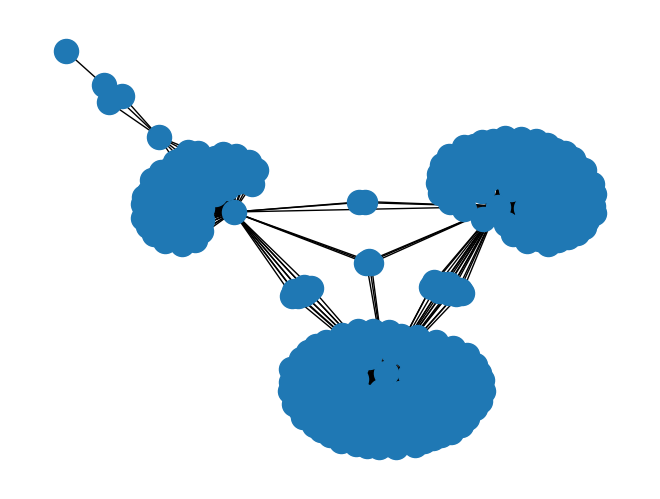

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(G, nx.spring_layout(G, seed=225))
plt.show()

گام پنجم: تشخیص جامعه فعال

در ایتدا گراف افراد شبکه اجتماعی ما را تشکیل دادیم. در این گراف گره افراد و یال‌ها ریتوییت کردن توییت‌های همدیگر است

بعد از آن  از آنجایی که جامعه فعال مجموعه افرادی هستند که باهمدیگه تعامل دارند، پس آمدیم و کامپوننت‌های گراف ما را تشکیل دادیم و به عنوان خروجی نمایش دادیم

گام ششم:

In [54]:
pip install textblob==0.17.1

In [55]:
pip install tweepy==3.10.0

  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.14.0
    Uninstalling tweepy-4.14.0:
      Successfully uninstalled tweepy-4.14.0


In [56]:
pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.1 MB/s eta 0:00:00


In [57]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=564871d3057498145bf663f869eafb4eb0488bc3094918ef2bffb47d560a20da
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
BROKER_URL = "localhost:9092"
TOPIC_NAME = "testing2"

### twitter
import tweepy
from tweepy.auth import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import json
import logging


### logging
FORMAT = "%(asctime)s | %(name)s - %(levelname)s - %(message)s"
LOG_FILEPATH = "/workspace/twitter_topic_analysis_dashboard/logs/testing.log"
logging.basicConfig(
    filename=LOG_FILEPATH,
    level=logging.INFO,
    filemode='w',
    format=FORMAT)

### Authenticate to Twitter
with open('src/credential.json','r') as f:
    credential = json.load(f)

CONSUMER_KEY = credential['twitter_api_key']
CONSUMER_SECRET = credential['twitter_api_secret_key']
ACCESS_TOKEN = credential['twitter_access_token']
ACCESS_TOKEN_SECRET = credential['twitter_access_token_secret']
BEARER_TOKEN = credential['bearer_token']



from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from kafka import KafkaProducer
producer = KafkaProducer(bootstrap_servers='localhost:9092',
    value_serializer=lambda v: v.encode('utf-8')) #Same port as your Kafka server


topic_name = "twitter_data"


class twitterAuth():
    """SET UP TWITTER AUTHENTICATION"""

    def authenticateTwitterApp(self):
        auth = OAuthHandler(consumer_key=CONSUMER_KEY, consumer_secret=CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

        return auth



class TwitterStreamer():

    """SET UP STREAMER"""
    def __init__(self):
        self.twitterAuth = twitterAuth()

    def stream_tweets(self):
        while True:
            listener = ListenerTS()
            auth = self.twitterAuth.authenticateTwitterApp()
            stream = Stream(auth, listener)
            stream.filter(track=["Starbucks"], stall_warnings=True, languages= ["en"])


class ListenerTS(StreamListener):

    def on_status(self, status):
        tweet = json.dumps({
            'id': status.id,
            'name': status.user.name,
            'user_location':status.user.location,
            'text': status.text,
            'fav': status.favorite_count,
            'tweet_date': status.created_at.strftime("%Y-%m-%d %H:%M:%S"),
            'tweet_location': status.place.full_name if status.place else None
        }, default=str)

        producer.send(topic_name, tweet)
        return True


if __name__ == "__main__":
    TS = TwitterStreamer()
    TS.stream_tweets()

In [ ]:
from kafka import KafkaConsumer
import json

topic_name = "twitter_data"

consumer = KafkaConsumer(
    topic_name,
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='latest',
     enable_auto_commit=True,
     auto_commit_interval_ms =  5000,
     fetch_max_bytes = 128,
     max_poll_records = 100,

     value_deserializer=lambda x: json.loads(x.decode('utf-8')))

for message in consumer:
 tweets = json.loads(json.dumps(message.value))
 print(tweets)

با توجه به اینکه tokenهای توییتر پولی هستند قادر به اجرا این بخش نبودیم

ولی در کل از Apache Kafka برای خواندن پیام از توییتر استفاده می‌کنیم

https://github.com/youheekil/Twitter-Streaming-with-Apache-Kafka-Docker-and-Python

با توجه به اتفاق فوق پیام‌هایی که قبلا خونده بودیم را می‌خوانیم روی آن‌ها پردازش می‌کنیم

In [ ]:
pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = []

In [61]:
my_stop_word = {'#', '.', ',', ':', '@', '!', ')', '(', '-', '?', "'s", '&', 'I', '’', '4', 'us', '2', 'The', '|', 'b', '1', '3', '2ND', 'A', '6'}

stop_words = stop_words.union(my_stop_word)

In [62]:
def remove_stop_word(sent: str):
  word_tokens = word_tokenize(sent)

  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)

In [63]:
import csv

allTweets=list(csv.reader(open('tweets.csv')))[1:]

In [64]:
for item in allTweets:
  remove_stop_word(item[2])

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.downloader.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [73]:
counter = 0
polarity = 0

for word in filtered_sentence:
  polarity += sid.polarity_scores(word)['compound']
  counter+=1

avgPolarity = polarity / counter
print('word :', counter, '\npolarity :', polarity, '\naverage polarity :', avgPolarity)
if avgPolarity >= 0.5:
  print('Positive')
elif avgPolarity <= -0.5:
  print('Negative')
else:
  print('Neutral')

word : 46282 
polarity : 1250.7219000000093 
average polarity : 0.027023938032064505
Neutral


In [ ]:
pip install ntscraper

In [ ]:
import pandas as pd
from ntscraper import Nitter

scraper = Nitter()

In [ ]:
import networkx as nx

G = nx.Graph()
user = {'imVkohli'}
selected_user = set()

for i in range(5):
  member = list(user - selected_user)[0]
  G.add_node(member)
  selected_user.add(member)
  tweet_number = scraper.get_profile_info(member)['stats']['tweets']

  tweets = scraper.get_tweets(member , mode='user', number=min(tweet_number, 500))

  for tweet in tweets['tweets']:
    if tweet['is-retweet'] == True:
      user.add(tweet['user']['username'][1:])
      G.add_edge(member, tweet['user']['username'][1:])

In [83]:
connected_components = nx.connected_components(G)

number_of_clusters = len(list(connected_components))
print("Number of clusters:", number_of_clusters)

Number of clusters: 1


گام اختیار: خواندن پیام با استفاده از Apache Kafka و بررسی حس کلی و تعداد خوشه‌های جامعه

در بتدا بال استفاده از Apache Kafka یک کلاینت و سرور نوشتیم که پیام‌ها را از توییتر بخواند ولی متاسفانه به دلیل پولی بودن api توییتر نمی تونستیم بخونیم، برای همین رفتیم سراغ توییت‌هایی که قبلا خوانده بودیم و آن‌ها را پردازش کردیم.

برای بررسی حس کلی جامعه، مثل گام سوم ابتدا توییت‌ها را خواندیم، بعدش کلمات بی معنی را جدا کردیم و آمدیم تعداد کلمات و جموع احساسات کلمات را حساب کردیم و میانگین گرفتیم و مشخص کردیم که حس کلی جامعه ما چی هست

برای بخش خوشه بعدی مثل گام پنجم گراف افراد را تشکیل دادیم و تعداد کامپوننت‌ها را شمردیم.